# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

# 02. Import Data

In [3]:
path = r'C:/Users/byl19/Acheivment 6/Acheivment 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned-Oil-Data.csv'))

# 03. Machine Learning and Regression

In [5]:
#exploring data visually
df.columns

Index(['Report Number', 'Accident Year', 'Accident Date', 'Accident Time',
       'Operator ID', 'Operator Name', 'Pipeline/Facility Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident City',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time',
       'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs',
       'Time Category'],
      dtype='object')

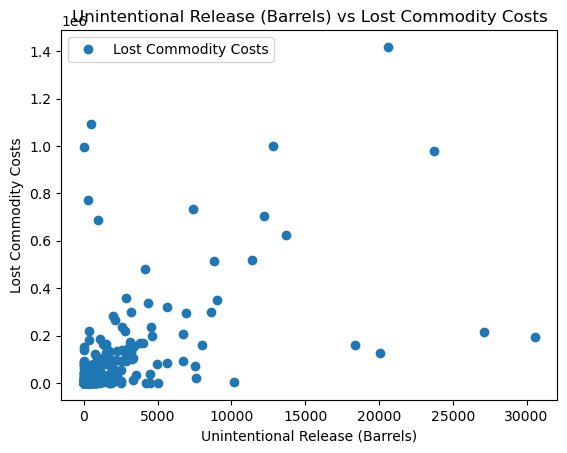

In [16]:
#scatterplot
df.plot(x = 'Unintentional Release (Barrels)', y='Lost Commodity Costs',style='o')
plt.title('Unintentional Release (Barrels) vs Lost Commodity Costs')  
plt.xlabel('Unintentional Release (Barrels)')  
plt.ylabel('Lost Commodity Costs')  
plt.show()

In [17]:
df[['Unintentional Release (Barrels)', 'Lost Commodity Costs']].describe()

,Unintentional Release (Barrels),Lost Commodity Costs
count,2795.000000,2.795000e+03
mean,207.245843,9.791266e+03
std,1368.667813,6.379611e+04
min,0.000000,0.000000e+00
25%,0.480000,2.000000e+01
50%,2.000000,1.000000e+02
75%,20.000000,7.000000e+02
max,30565.000000,1.417839e+06


#### Looking at the pairplots from exercise 6.2, these two variables relationship looked like they would be the strongest. In this dataset, there are not a lot of good looking realtionships between two varibales which suggests theres a lot more to these oil spills than this data set provides. For the sake of this exercise I will use these two variables and test their regression line fit and hypothesis.

#### Hypothesis: As more barrels of liquid are unintentionally released, the higher lost commodity costs will be.

In [20]:
#reshaping data into Numpy arrays
X = df['Unintentional Release (Barrels)'].values.reshape(-1,1)
y = df['Lost Commodity Costs'].values.reshape(-1,1)

In [21]:
#splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
#regression object
regression = LinearRegression()

In [23]:
#putting regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
#creating prediction for y on test set
y_predicted = regression.predict(X_test)

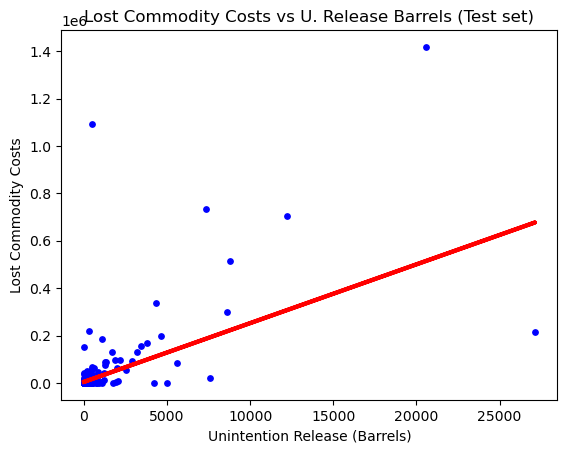

In [27]:
#regression on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Lost Commodity Costs vs U. Release Barrels (Test set)')
plot_test.xlabel('Unintention Release (Barrels)')
plot_test.ylabel('Lost Commodity Costs')
plot_test.show()

#### For me, the fit of this line is pretty terrible. There are a lot of values above the line which could be outliers and another plot should be made with these taken out. Even with the outliers gone im still sure the fit of this line would be not too great and there are a lot of values scattered far away from that regression line.

In [28]:
#creating mean squared erros and r2 objects
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [29]:
#printing model summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[24.79779527]]
Mean squared error:  3589162743.3050485
R2 score:  0.3966341479526462


In [30]:
#y predicted vs y actual
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,50,4413.243287
1,100,4451.183914
2,10,4405.803949
3,0,4412.747331
4,184,4525.577300
5,4250,7935.274149
6,96,4426.386119
7,17328,13874.346116
8,153300,4402.084279
9,2,4413.987221


#### Again, this model seemed to perform very poorly. The R2 score was relativley low and the MSE was extremely high. I think it turned out this way becasue of our outlier high values scewing the data and increasing the mean greatly. The predicted y values too were much higher than the actual and I think it was becasue of this. 